In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

/content/drive/Shareddrives/MobileNetV2


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [ ]:
# Set the batch size and image size
batch_size = 32
img_size = (224, 224)

In [ ]:
# Define your custom dataset directory
train_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
validation_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'
test_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'

In [ ]:
# Create the data generators for train/validation/test sets
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 840 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
# Load the pre-trained NasNetMobile model without the top layer
nasnet = NASNetMobile(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

19993432/19993432 [==============================] - 0s 0us/step


In [ ]:
# Freeze all the layers in the pre-trained model
for layer in nasnet.layers:
    layer.trainable = False

In [ ]:
# Add a global average pooling layer and a dense layer for the custom classification task
x = GlobalAveragePooling2D()(nasnet.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [ ]:
# Create the custom model
model = Model(inputs=nasnet.input, outputs=predictions)

In [ ]:
# Compile the model with a suitable optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 111, 111, 32  128         ['stem_conv1[0][0]']             
                                )                                                             

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 14.8 MB/s eta 0:00:00


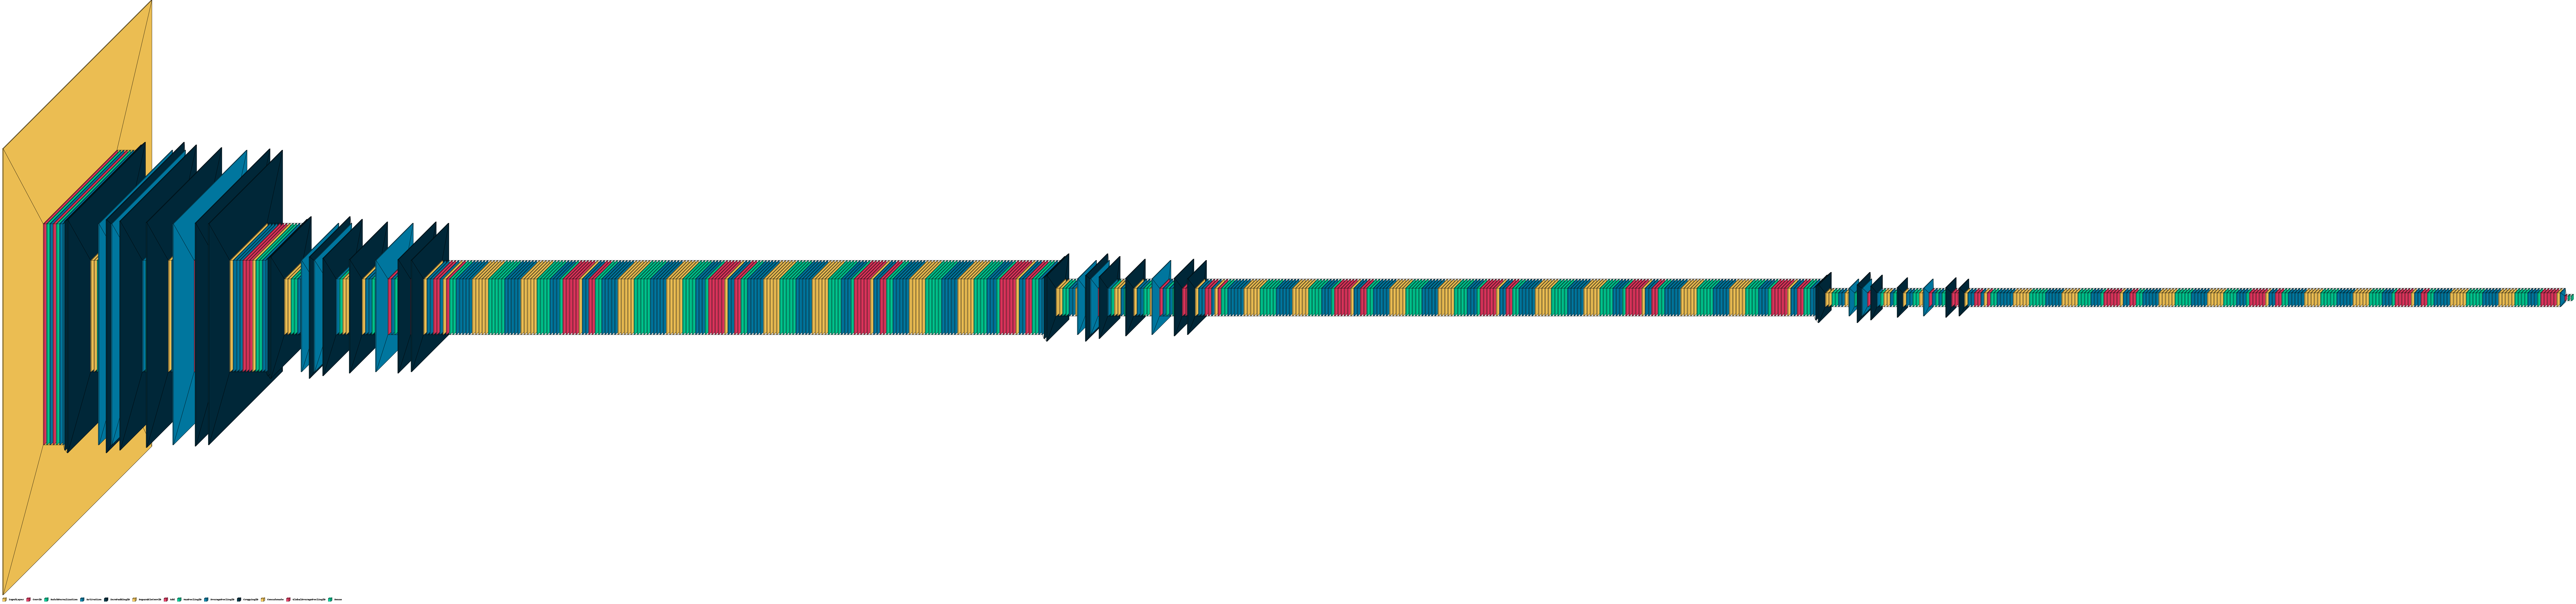

In [ ]:
model1=model
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, scale_xy=8, scale_z=3, max_z=3, legend=True)
#visualkeras.layered_view(model1, legend=True)

In [ ]:
# Train the model with the train and validation generators
num_epochs = 10
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Epoch 1/10
27/27 [==============================] - 227s 8s/step - loss: 1.0062 - accuracy: 0.5560 - val_loss: 0.4812 - val_accuracy: 0.7833
Epoch 2/10
27/27 [==============================] - 69s 3s/step - loss: 0.5093 - accuracy: 0.7690 - val_loss: 0.4885 - val_accuracy: 0.7222
Epoch 3/10
27/27 [==============================] - 63s 2s/step - loss: 0.4331 - accuracy: 0.8048 - val_loss: 0.4131 - val_accuracy: 0.7833
Epoch 4/10
27/27 [==============================] - 64s 2s/step - loss: 0.4148 - accuracy: 0.8071 - val_loss: 0.3418 - val_accuracy: 0.8500
Epoch 5/10
27/27 [==============================] - 64s 2s/step - loss: 0.3531 - accuracy: 0.8619 - val_loss: 0.3838 - val_accuracy: 0.8111
Epoch 6/10
27/27 [==============================] - 66s 2s/step - loss: 0.3186 - accuracy: 0.8714 - val_loss: 0.5656 - val_accuracy: 0.6833
Epoch 7/10
27/27 [==============================] - 63s 2s/step - loss: 0.2961 - accuracy: 0.8810 - val_loss: 0.4456 - val_accuracy: 0.8000
Epoch 8/10
27/27 [=

In [ ]:
# Evaluate the model on the test set
model.evaluate(test_generator)

6/6 [==============================] - 43s 8s/step - loss: 0.4260 - accuracy: 0.8111


[0.4259653389453888, 0.8111110925674438]

In [ ]:
# Evaluate the model on the validation set
validation_loss, validation_acc = model.evaluate(validation_generator)
print('Validation Loss:', validation_loss)
print('Validation Accuracy:', validation_acc)

6/6 [==============================] - 6s 951ms/step - loss: 0.3423 - accuracy: 0.8556
Validation Loss: 0.34234726428985596
Validation Accuracy: 0.855555534362793


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

6/6 [==============================] - 5s 855ms/step - loss: 0.4260 - accuracy: 0.8111
Test Loss: 0.425965279340744
Test Accuracy: 0.8111110925674438


In [ ]:
# Save the model
#model.save('vgg19_custom.h5')